In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy.special import erf
import h5py
import os
from unyt import angstrom, Msun, yr, m
from synthesizer.grid import Grid
import swiftascmaps


plt.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 14})

def get_n_colors_from_cmap(n, cmap_name="viridis"):
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i) for i in np.linspace(0, 0.9, n)]
    return colors

In [2]:
subvolumes = [
    "0_0_0",
    "0_0_1",
    "0_1_0",
    "0_1_1",
    "1_0_0",
    "1_0_1",
    "1_1_0",
    "1_1_1"
]

subvolumes = ["0_0_0"]  # keep only the ones you want

pipeline_dir = '/mnt/home/snewman/ceph/pipeline_results/combined'

grp_total = 'Galaxies/Spectra/SpectralLuminosityDensities/total'
grp_bh = 'Galaxies/BlackHoles/Spectra/SpectralLuminosityDensities/agn_incident'
grp_star = 'Galaxies/Stars/Spectra/SpectralLuminosityDensities/stellar_incident'

spectra = np.concatenate([
    h5py.File(os.path.join(pipeline_dir, f'pipeline_no_dust_{subvol}_bhmasscut.hdf5'), 'r')[f'{grp_total}'][:]
    for subvol in subvolumes
])

bh_spectra = np.concatenate([
    h5py.File(os.path.join(pipeline_dir, f'pipeline_no_dust_{subvol}_bhmasscut.hdf5'), 'r')[f'{grp_bh}'][:]
    for subvol in subvolumes
])

star_spectra = np.concatenate([
    h5py.File(os.path.join(pipeline_dir, f'pipeline_no_dust_{subvol}_bhmasscut.hdf5'), 'r')[f'{grp_star}'][:]
    for subvol in subvolumes
])

# Manually add the bh and star spectra to get total
spectra_manual = bh_spectra + star_spectra

print(spectra.shape)
print(bh_spectra.shape)
print(star_spectra.shape)
print(spectra_manual.shape)

(92016, 1999)
(92016, 1999)
(92016, 1999)
(92016, 1999)


/tmp/ipykernel_1596069/236111337.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wavelengths), np.log10(spectra[idx]), color=colors[i], lw=2)


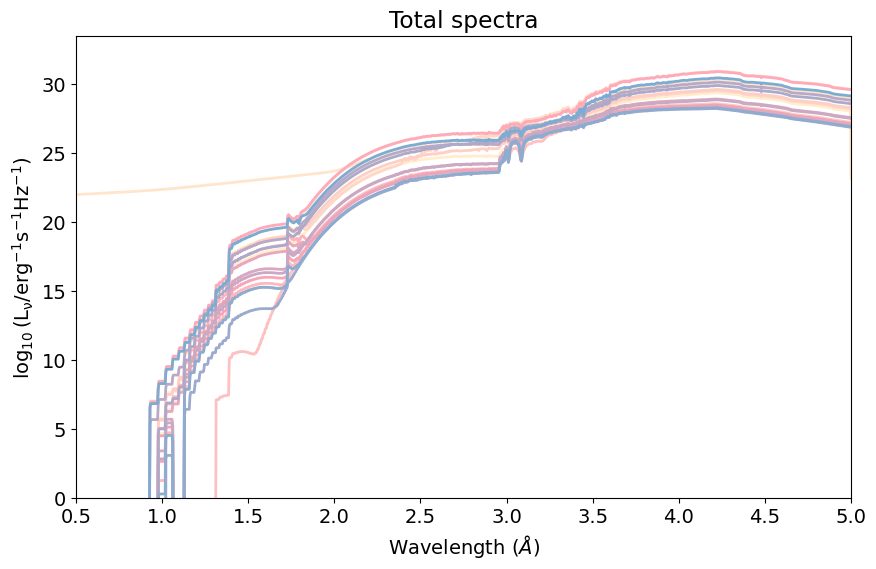

In [3]:
# Get wavelengths from the AGN grid
grid_dir = '/mnt/ceph/users/snewman/grids'
grid_name = 'qsosed.hdf5'
grid_agn = Grid(grid_dir=grid_dir, grid_name=grid_name, ignore_lines=True)
wavelengths = grid_agn.lam

# Pick random galaxies
gal_idx = np.random.choice(spectra.shape[0], 20, replace=False)

colors = get_n_colors_from_cmap(len(gal_idx), cmap_name="swift.lover_r")

plt.figure(figsize=(10, 6))
for i, idx in enumerate(gal_idx):
    plt.plot(np.log10(wavelengths), np.log10(spectra[idx]), color=colors[i], lw=2)

plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel(r'$\rm \log_{10}(L_{\nu}/erg^{-1} s^{-1} Hz^{-1})$')
plt.title("Total spectra")
plt.xlim(left=0.5, right=5)
plt.ylim(bottom=0)
plt.show()

[66386 60077 29838 30262 32142 41641  6457 43826 44683  5049 32353 27929
 46411 77620 21038 32405  2608 58686 23645 46552 88968  5468 46702  6289
 84696 20671 47018 41689 76968 49546 43430 26391 60183 24672 84940 15462
 77788 45516 36850 78904  9448 47413 82210 52002 21568 30618 68864 65937
 56439 62434 71168 53415 24326 56728 40987 37480 57177 38664 91010 16151
 74769 72974 32044 31199 72485 19974  4225 36763 48003 13854 49243 66834
 10728  6227 11608 32911 54596 47525 34260  9584 47960 17404  4863 48153
 23830 11715  1814 10347 69284 86718 81180 12835 64133 63935 89584  1774
   250 38078 56595 76885]


/tmp/ipykernel_1596069/753001841.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wavelengths), np.log10(spectra[i]), lw=lw, label='Total', color=color_total)
/tmp/ipykernel_1596069/753001841.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wavelengths), np.log10(bh_spectra[i]), lw=lw, label='BH', color=color_bh)
/tmp/ipykernel_1596069/753001841.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wavelengths), np.log10(star_spectra[i]), lw=lw, label='Stars', color=color_star)


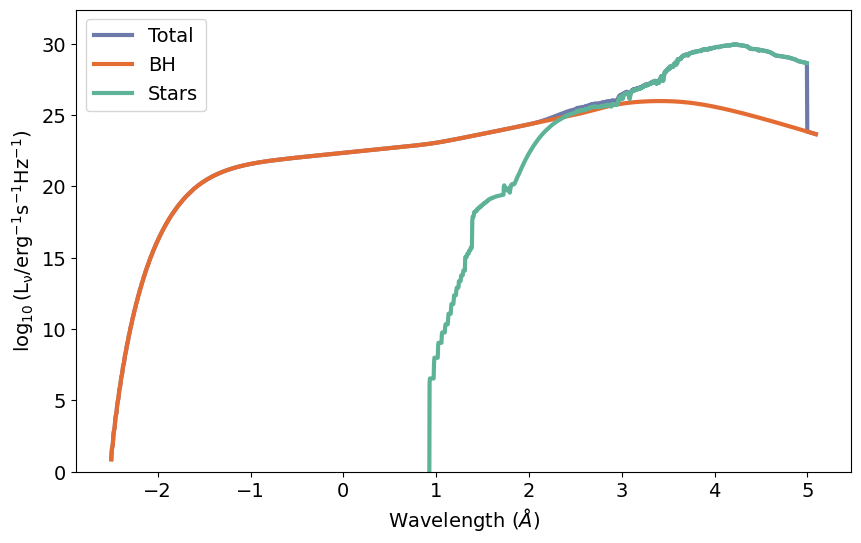

In [9]:
# Pick random galaxies
gal_idx = np.random.choice(spectra.shape[0], 100, replace=False)
print(gal_idx)

gal_idx = [258]

plt.figure(figsize=(10, 6))
lw = 3
color_bh = '#e46c32'
color_star = '#5eb298'
color_total = '#6e7aaa'

for i in gal_idx :
    plt.plot(np.log10(wavelengths), np.log10(spectra[i]), lw=lw, label='Total', color=color_total)
    plt.plot(np.log10(wavelengths), np.log10(bh_spectra[i]), lw=lw, label='BH', color=color_bh)
    plt.plot(np.log10(wavelengths), np.log10(star_spectra[i]), lw=lw, label='Stars', color=color_star)

plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel(r'$\rm \log_{10}(L_{\nu}/erg^{-1} s^{-1} Hz^{-1})$')
#plt.xlim(left=1, right=4)
plt.ylim(bottom=0)
plt.legend()
plt.show()

[  258   262   266 ... 91995 91996 91997]
4.730699008868023


/tmp/ipykernel_1596069/3796363799.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(wavelengths), np.log10(spectra[idx]), lw=lw, color=colors[i], label='Total')


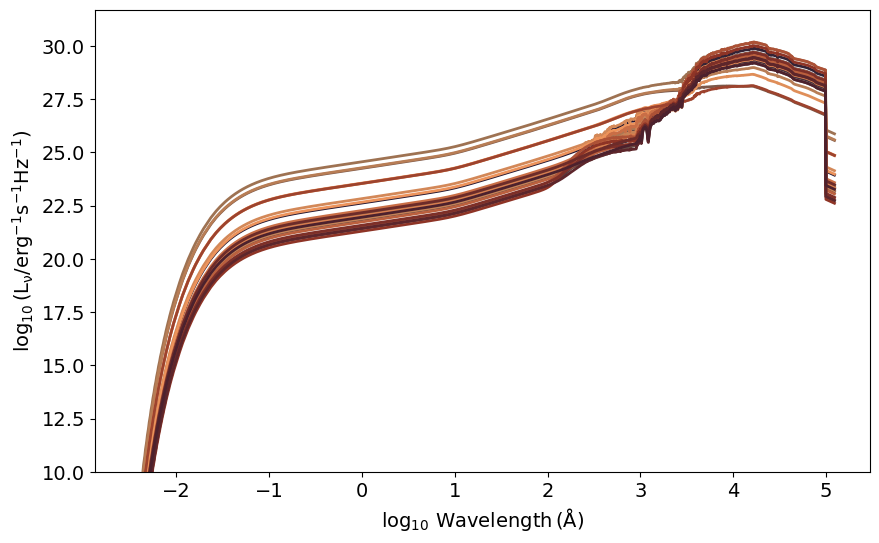

In [8]:
# Filter galaxies where bh_spectra is not all zeros
nonzero_idx = np.where(bh_spectra.sum(axis=1) > 0)[0]

print(nonzero_idx)

print(len(nonzero_idx)/len(spectra) * 100)

# Pick random subset (e.g. 25 galaxies for a 5x5 grid)
gal_idx = np.random.choice(nonzero_idx, 25, replace=False)

# Grid size
n_rows, n_cols = 5, 5

lw = 2
color_bh = '#e46c32'
color_star = '#5eb298'
color_total = '#6e7aaa'

colors = get_n_colors_from_cmap(len(gal_idx), cmap_name="swift.evermore_shifted")

plt.figure(figsize=(10, 6))

for i, idx in enumerate(gal_idx):
    plt.plot(np.log10(wavelengths), np.log10(spectra[idx]), lw=lw, color=colors[i], label='Total')

plt.ylim(bottom=10)
plt.xlabel(r"$\log_{10} \, \rm Wavelength \, (\AA)$")
plt.ylabel(r'$\rm \log_{10}(L_{\nu}/erg^{-1} s^{-1} Hz^{-1})$')
#plt.legend()
plt.show()

Using wavelength index 1516 wavelength (m) = 1453.4371148994896 Å -> (Å) = 1453.4371148994896 dimensionless


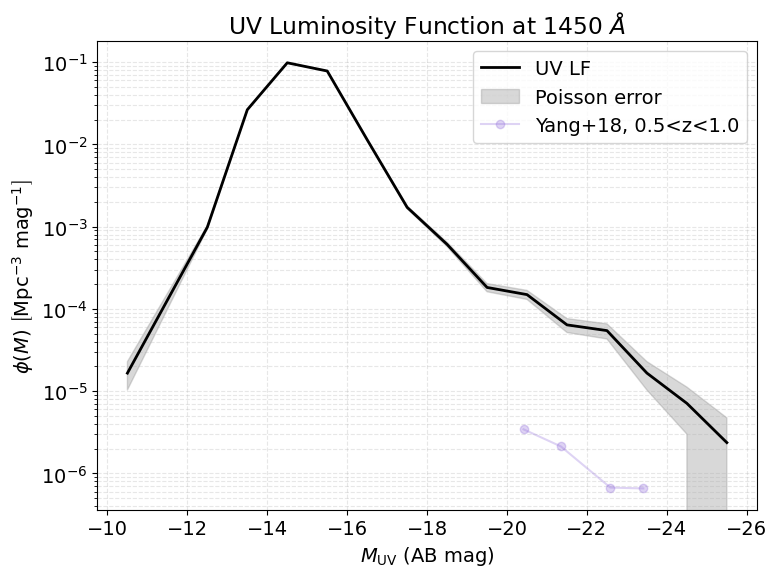

M = -25.50  phi = 2.370e-06 +/- 2.370e-06  (counts=1)
M = -24.50  phi = 7.111e-06 +/- 4.106e-06  (counts=3)
M = -23.50  phi = 1.659e-05 +/- 6.271e-06  (counts=7)
M = -22.50  phi = 5.452e-05 +/- 1.137e-05  (counts=23)
M = -21.50  phi = 6.400e-05 +/- 1.232e-05  (counts=27)
M = -20.50  phi = 1.493e-04 +/- 1.881e-05  (counts=62)
M = -19.50  phi = 1.825e-04 +/- 2.080e-05  (counts=77)
M = -18.50  phi = 6.092e-04 +/- 3.800e-05  (counts=257)
M = -17.50  phi = 1.719e-03 +/- 6.382e-05  (counts=725)
M = -16.50  phi = 1.139e-02 +/- 1.643e-04  (counts=4807)
M = -15.50  phi = 7.815e-02 +/- 4.304e-04  (counts=32968)
M = -14.50  phi = 9.834e-02 +/- 4.828e-04  (counts=41488)
M = -13.50  phi = 2.642e-02 +/- 2.503e-04  (counts=11147)
M = -12.50  phi = 9.861e-04 +/- 4.835e-05  (counts=416)
M = -10.50  phi = 1.659e-05 +/- 6.271e-06  (counts=7)


In [10]:
# Box size in Mpc
box_size_mpc = 150

# Choose UV reference wavelength (1500 Å)
uv_ref = 1450 * angstrom 

# find index in wavelengths closest to 1500 Å
uv_idx = np.argmin(np.abs(wavelengths - uv_ref))
print("Using wavelength index", uv_idx, "wavelength (m) =", wavelengths[uv_idx], "-> (Å) =", wavelengths[uv_idx]/angstrom)

# Extract L_nu at 1500 Å for all galaxies
Lnu_uv = spectra[:, uv_idx].astype(float) 

# If there are non-positive values, remove them (can't take log)
mask_positive = Lnu_uv > 0
if np.sum(~mask_positive) > 0:
    print(f"Warning: {np.sum(~mask_positive)} galaxies have non-positive Lnu; they will be excluded.")
Lnu_uv = Lnu_uv[mask_positive]

# Convert L_nu [erg s^-1 Hz^-1] to M_AB (AB absolute magnitude)
Muv = -2.5 * np.log10(Lnu_uv) + 51.60

# Set magnitude bins (adjust range & bin width to your data)
bin_width = 1
mag_min, mag_max = np.floor(Muv.min()) - 1, np.ceil(Muv.max()) + 1
bins = np.arange(mag_min, mag_max + bin_width, bin_width)
hist, edges = np.histogram(Muv, bins=bins)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Compute comoving volume 
volume_mpc3 = box_size_mpc**3 / 8  # Mpc^3

# Convert counts to number density phi(M) [Mpc^-3 mag^-1]
phi = hist / (volume_mpc3 * bin_width)

# Poisson errors on counts -> sigma_phi = sqrt(N) / (V * bin_width)
sigma_phi = np.sqrt(hist) / (volume_mpc3 * bin_width)

# For plotting, avoid zeros when using log
positive = phi > 0

# Plot LF as line with shaded error
plt.figure(figsize=(8,6))

plt.plot(bin_centers[positive], phi[positive], color="k", lw=2, label="UV LF")
plt.fill_between(bin_centers[positive],
                 phi[positive] - sigma_phi[positive],
                 phi[positive] + sigma_phi[positive],
                 color="gray", alpha=0.3, label="Poisson error")



# Plot observational data

# Plot x from Shen+20

obs_points = [
    (-23.40893470790378, 6.572163109701064e-7),
    (-22.58419243986254, 6.731703824144982e-7),
    (-21.347079037800686, 2.1287516617963725e-6),
    (-20.412371134020617, 3.439207136848946e-6)
]

obs_x, obs_phi = zip(*obs_points)

plt.plot(obs_x, obs_phi, marker='o', ls=None, color='mediumpurple', alpha=0.3, label='Yang+18, 0.5<z<1.0')



plt.yscale('log')
plt.xlabel(r'$M_{\rm UV}$ (AB mag)')
plt.ylabel(r'$\phi(M)\ \left[\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1}\right]$')
plt.title(r'UV Luminosity Function at 1450 $\AA$')
plt.gca().invert_xaxis()   # brighter mags to the left
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print some numbers for reference
for m, p, s in zip(bin_centers[positive], phi[positive], sigma_phi[positive]):
    print(f"M = {m:.2f}  phi = {p:.3e} +/- {s:.3e}  (counts={int((p*volume_mpc3*bin_width))})")